## Image denoising

In [4]:
from skimage import io
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np
from scipy.fft import fft2, fftshift, ifft2
from skimage import img_as_float
from skimage import filters

In [5]:
image = img_as_float(io.imread('0014n.png', as_gray = True))

In [6]:
image_org = io.imread('0014.png', as_gray=True)

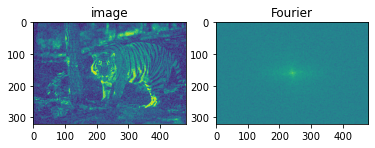

In [4]:
imfft = fftshift(fft2(image))
imm = np.log(np.abs(imfft))
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(image)
t = ax.set_title('image')
ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imm)
t = ax.set_title('Fourier')

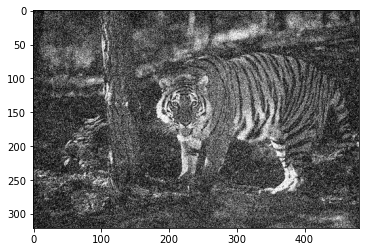

In [93]:
plt.imshow(image, cmap='gray')

In [165]:
from scipy import fftpack

ft_im = fftshift(fft2(image))

keep_fraction = 0.55
image_fft2 = ft_im.copy()
r, c = image_fft2.shape
image_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
image_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

<Figure size 432x288 with 0 Axes>

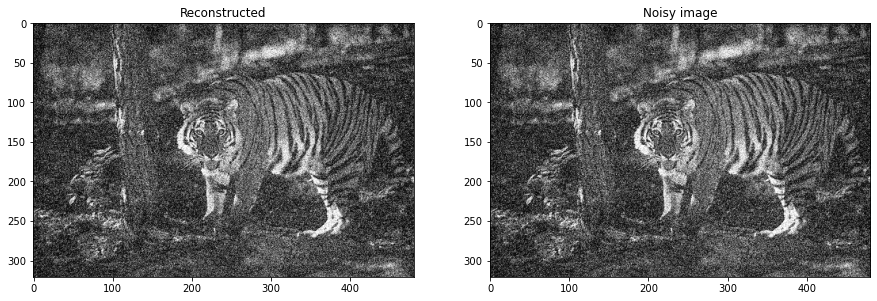

In [166]:
#Step 3
image_new = np.abs(fftpack.ifft2(image_fft2))

plt.figure()

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(image_new, cmap="gray")
ax1.set_title('Reconstructed');

ax3.imshow(image, cmap="gray")
ax3.set_title('Noisy image');

#plt.imshow(image_new, cmap ='gray')
#plt.title('Reconstructed Image')

In [5]:
ii = np.abs(ifft2(imfft))

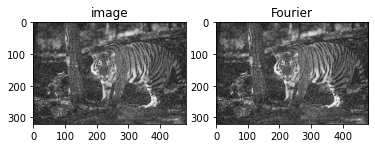

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(image, cmap='gray')
t = ax.set_title('image')
ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(ii, cmap = 'gray')
t = ax.set_title('Fourier')

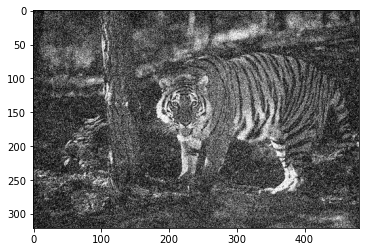

In [7]:
plt.imshow(image, cmap = 'gray')

In [8]:
image.shape, image.dtype


((321, 481), dtype('float64'))

In [37]:
M,N = image.shape

Text(0.5, 1.0, 'Original Noisy Image')

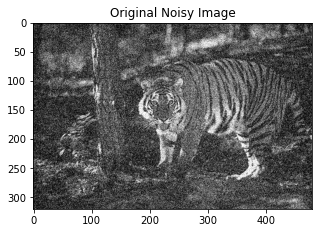

In [10]:
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image,cmap = "gray")
ax.set_title('Original Noisy Image')

In [11]:
#Return multidimensional discrete Fourier transform.
F = fftpack.fftn(image) 
F_magnitude = np.abs(F)   #absolute value of F

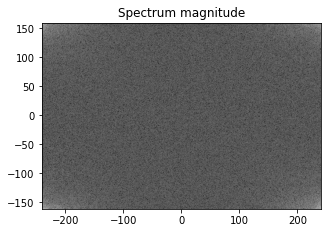

In [12]:
f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [13]:

#shifting 0 frequency component
F_magnitude = fftpack.fftshift(F_magnitude)

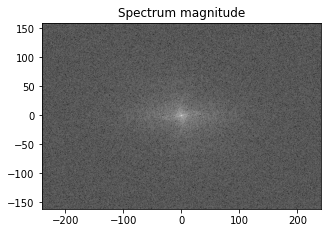

In [14]:

f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [15]:
# Set block around center of spectrum to zero
K = 25
F_magnitude[M // 2 - K: M // 2 + K, N // 2 - K: N // 2 + K] = 0

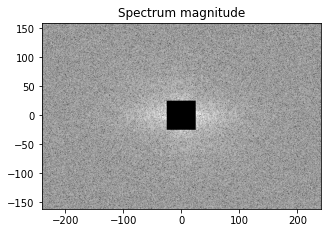

In [16]:
f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [17]:

# Find all peaks lower than the 98th percentile
peaks = F_magnitude < np.percentile(F_magnitude, 98) #for 98 percentile
peaks1 = F_magnitude < np.percentile(F_magnitude, 100) #for 100 percentile

# Shift the peaks back to align with the original spectrum
peaks = fftpack.ifftshift(peaks) #for 98 percentile
peaks1 = fftpack.ifftshift(peaks1) # for 100 percentile

In [18]:
# Make a copy of the original (complex) spectrum
F_dim = F.copy()  # for 98 percentile
F_dim1 = F.copy() #for 100 percentile

# Set those peak coefficients to zero
F_dim = F_dim * peaks.astype(int) # for 98 percentile
F_dim1 = F_dim1 * peaks1.astype(int) #for 100 percentile

f, (ax0, ax2)= plt.subplots(1, 2, figsize=(10,10))
ax0.imshow(np.log10(1 + np.abs(F_dim)), cmap='gray')
ax0.set_title('Spectrum after suppression(98 %ile)')

ax2.imshow(np.log10(1 + np.abs(F_dim1)), cmap='gray')
ax2.set_title('Spectrum after suppression(100 %ile)')

Text(0.5, 1.0, 'Spectrum after suppression(100 %ile)')

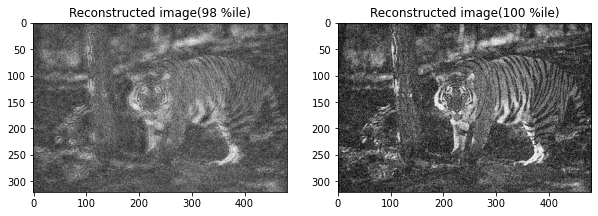

In [19]:
# Do the inverse Fourier transform to get back to an image.
# Since we started with a real image, we only look at the real part of
# the output.
image_filtered = np.real(fftpack.ifft2(F_dim)) #for 98 percentile
image_filtered1 = np.real(fftpack.ifft2(F_dim1)) #for 100 percentile

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(image_filtered, cmap="gray")
ax1.set_title('Reconstructed image(98 %ile)');

ax3.imshow(image_filtered1, cmap="gray")
ax3.set_title('Reconstructed image(100 %ile)');

In [20]:
from skimage.color import gray2rgb


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


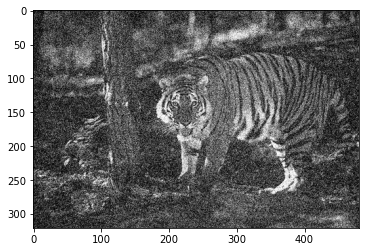

In [21]:
plt.imshow(gray2rgb(image_filtered1))

In [71]:
## mean squre error

sum = 0.0
x=0
y=0

for x in range(M):
    
    for y in range(N):
        
        difference = (img3[x,y] - image_org[x,y])
        sum = sum + difference*difference
        y+=1
    x+=1

mse = sum /(M*N)
print("The mean square error is %f\n",mse) 

The mean square error is %f
 [0.00822872 0.00709406 0.00578625]


In [62]:
image[320,480]

0.037857254901960784

In [64]:
image = io.imread('0014n.png')

In [1]:
# median filter

image_new = filters.median(image, np.ones((3, 3)))

plt.figure()

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(image_new, cmap="gray")
ax1.set_title('Reconstructed');

ax3.imshow(image, cmap="gray")
ax3.set_title('Noisy image');

NameError: name 'filters' is not defined

In [ ]:
# median filter

image_new = filters.median(image, np.ones((3, 3)))

plt.figure()

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(image_new, cmap="gray")
ax1.set_title('Reconstructed');

ax3.imshow(image, cmap="gray")
ax3.set_title('Noisy image');

In [188]:
# mean filter



In [190]:
# Wavelet filter



In [ ]:
# Low pass filter



In [2]:
# NLM FILTER

from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma

In [61]:
image = img_as_float(io.imread('0014n.png'))

In [59]:
image_org = img_as_float(io.imread('0014.png'))

In [53]:
sigma_est = np.mean(estimate_sigma(image, multichannel=True))
imd = denoise_nl_means(image, h=0.5 * sigma_est, sigma=sigma_est, fast_mode=True)

<Figure size 432x288 with 0 Axes>

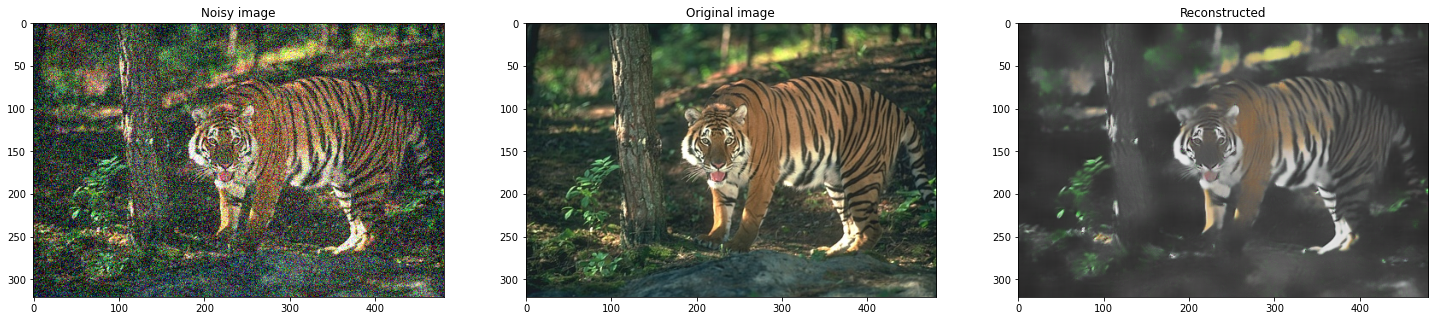

In [62]:
plt.figure()

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(25,25))

ax1.imshow(image, cmap="gray")
ax1.set_title('Noisy image');

ax2.imshow(image_org)
ax2.set_title('Original image');

ax3.imshow(imd, cmap="gray")
ax3.set_title('Reconstructed');





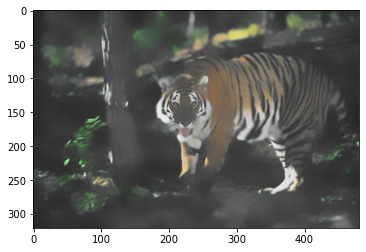

In [55]:
plt.imshow(imd)

In [ ]:
# Wiener filter



In [77]:
from skimage.filters import gaussian, laplace, rank

img3 = gaussian(image, sigma=2)
img5 = gaussian(image, sigma=5)
img10 = gaussian(image, sigma=10)

<ipython-input-77-dcb0bb147e65>:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img3 = gaussian(image, sigma=2)
<ipython-input-77-dcb0bb147e65>:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img5 = gaussian(image, sigma=5)
<ipython-input-77-dcb0bb147e65>:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img10 = gaussian(image, sigma=10)


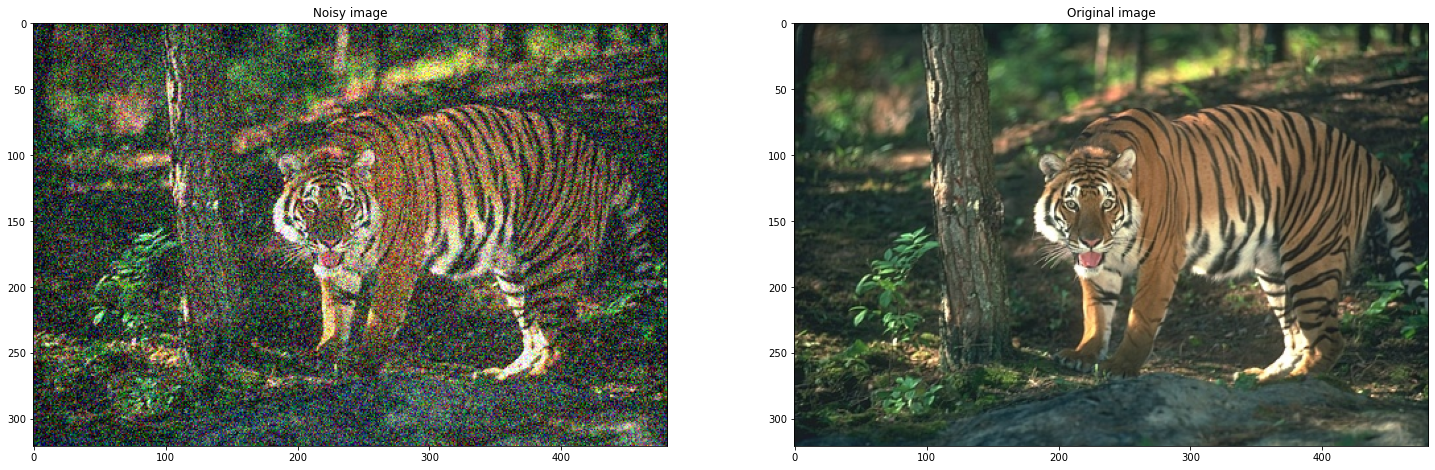

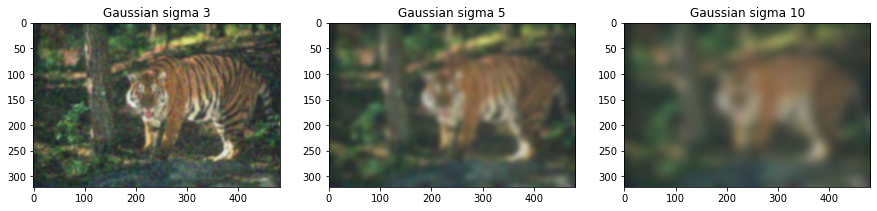

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,25))

ax1.imshow(image, cmap="gray")
ax1.set_title('Noisy image');

ax2.imshow(image_org)
ax2.set_title('Original image');

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,15))

ax1.imshow(img3, cmap="gray")
ax1.set_title('Gaussian sigma 3');

ax2.imshow(img5)
ax2.set_title('Gaussian sigma 5');

ax3.imshow(img10, cmap="gray")
ax3.set_title('Gaussian sigma 10');